In [1]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/playground-series-s3e16/sample_submission.csv
/kaggle/input/playground-series-s3e16/train.csv
/kaggle/input/playground-series-s3e16/test.csv


# Taking a Look at the Data

In [2]:
train_df = pd.read_csv("/kaggle/input/playground-series-s3e16/train.csv")
test_df = pd.read_csv("/kaggle/input/playground-series-s3e16/test.csv")

In [3]:
train_df.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [4]:
train_df.set_index('id',inplace=True)

In [5]:
train_df.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
id,,,,,,,,,
0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74051 entries, 0 to 74050
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             74051 non-null  object 
 1   Length          74051 non-null  float64
 2   Diameter        74051 non-null  float64
 3   Height          74051 non-null  float64
 4   Weight          74051 non-null  float64
 5   Shucked Weight  74051 non-null  float64
 6   Viscera Weight  74051 non-null  float64
 7   Shell Weight    74051 non-null  float64
 8   Age             74051 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 5.6+ MB


In [7]:
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Length,74051.0,1.317460,0.287757,0.187500,1.150000,1.375000,1.537500,2.012815
Diameter,74051.0,1.024496,0.237396,0.137500,0.887500,1.075000,1.200000,1.612500
Height,74051.0,0.348089,0.092034,0.000000,0.300000,0.362500,0.412500,2.825000
Weight,74051.0,23.385217,12.648153,0.056699,13.437663,23.799405,32.162508,80.101512
Shucked Weight,74051.0,10.104270,5.618025,0.028349,5.712424,9.908150,14.033003,42.184056
Viscera Weight,74051.0,5.058386,2.792729,0.042524,2.863300,4.989512,6.988152,21.545620
Shell Weight,74051.0,6.723870,3.584372,0.042524,3.968930,6.931453,9.071840,28.491248
Age,74051.0,9.967806,3.175189,1.000000,8.000000,10.000000,11.000000,29.000000


# Exploratory Data Analysis

## Univariate Analysis

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Sex', ylabel='count'>

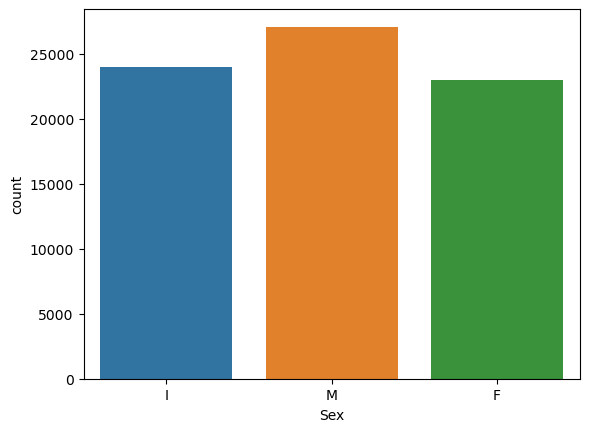

In [9]:
#Sex column
sns.countplot(data=train_df,x='Sex')

In [10]:
train_df['Age'].unique()

array([ 9,  8, 11, 10, 12,  7,  5, 14,  6, 13, 16,  4, 18, 15, 17,  3, 19,
       23, 21, 20, 26, 22, 27, 24, 25, 29,  2,  1])

<Axes: xlabel='Age', ylabel='count'>

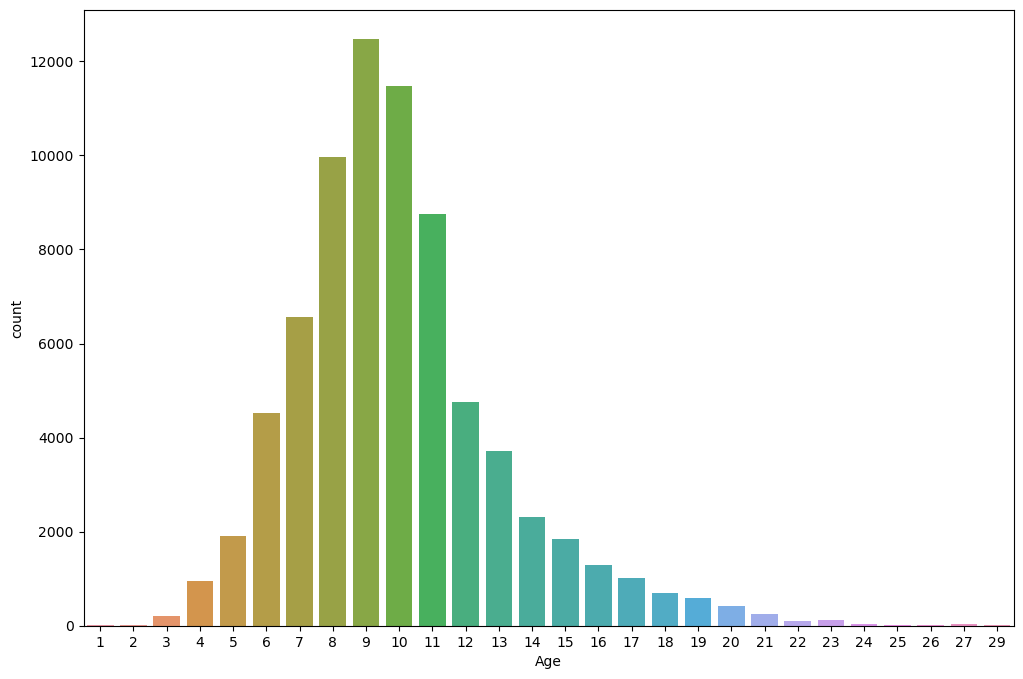

In [11]:
plt.figure(figsize=(12,8))
sns.countplot(data=train_df,x='Age')

<Axes: >

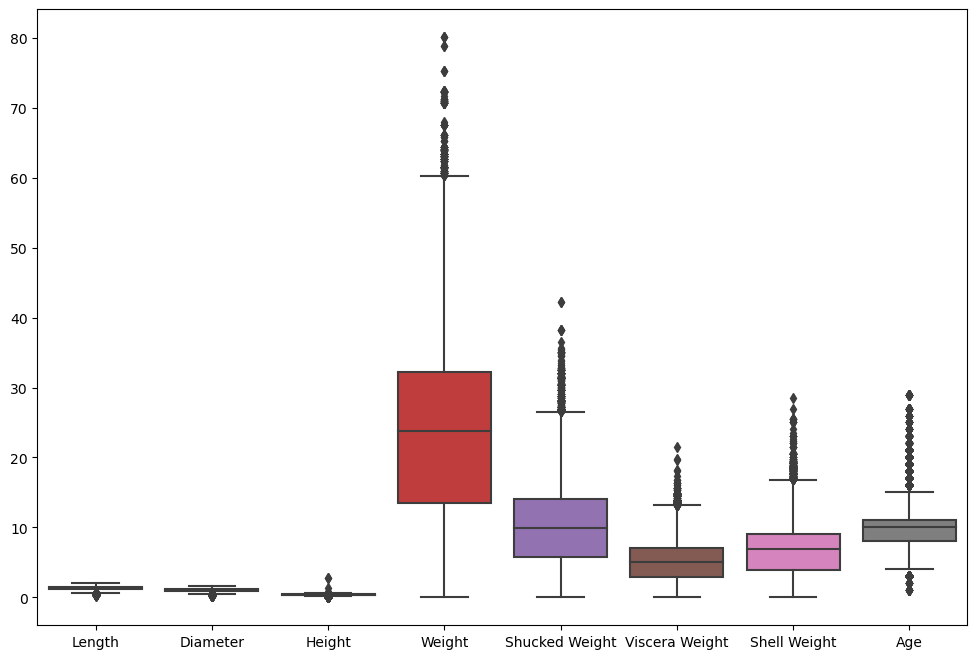

In [12]:
plt.figure(figsize=(12,8))
sns.boxplot(data=train_df)

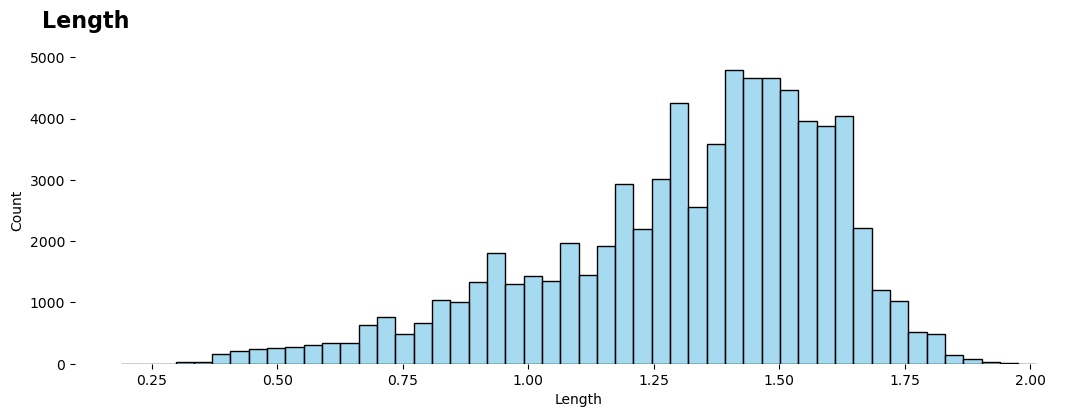

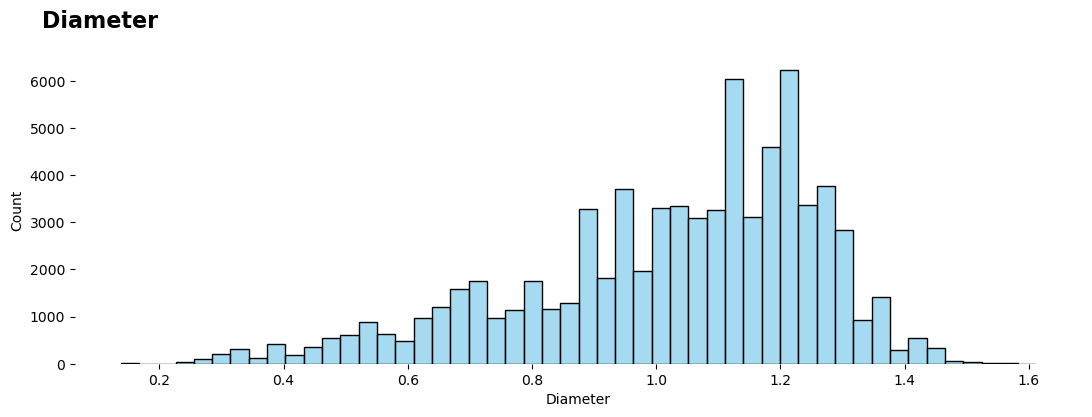

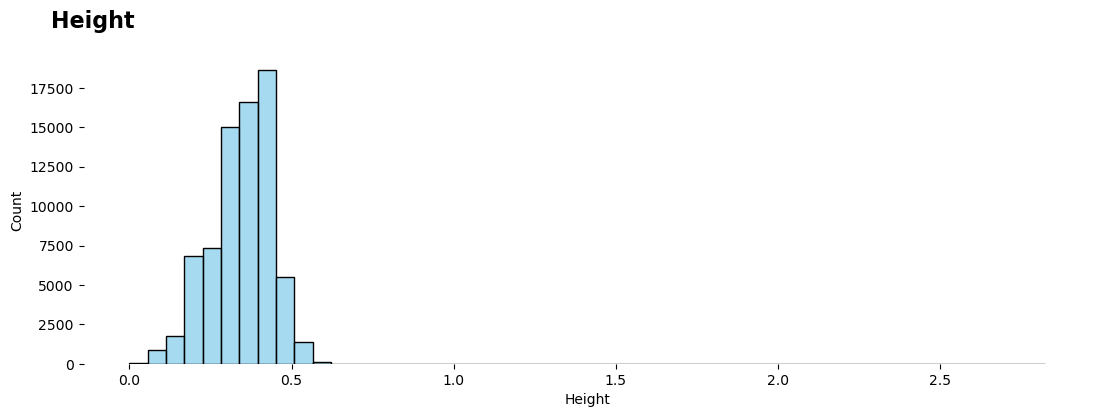

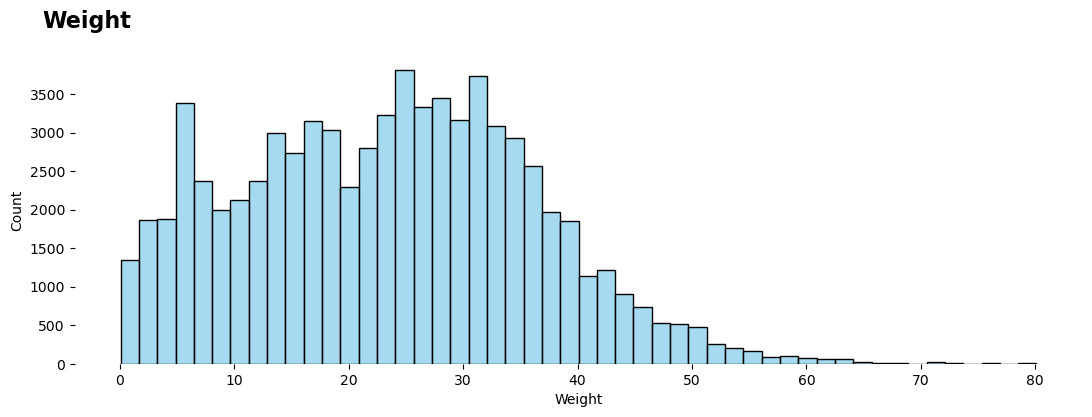

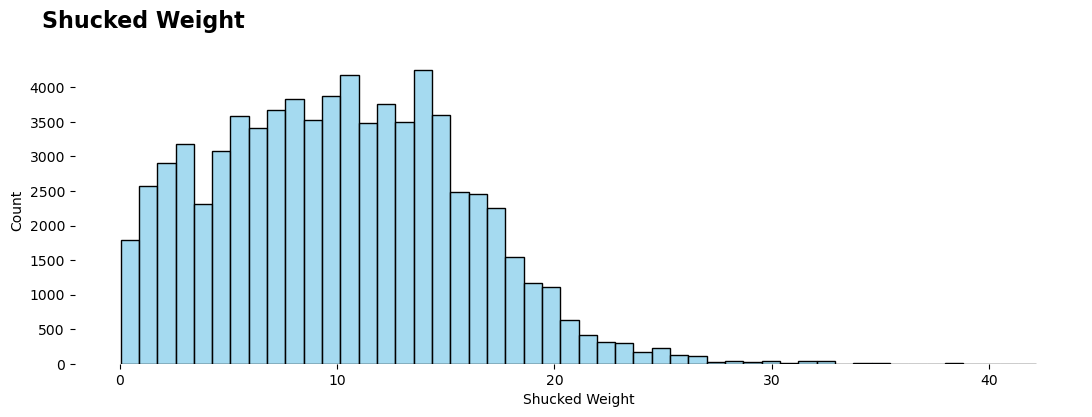

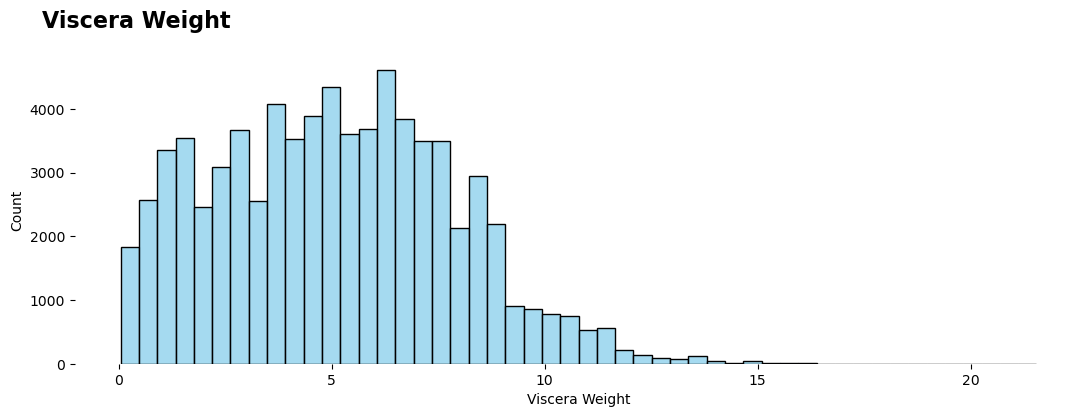

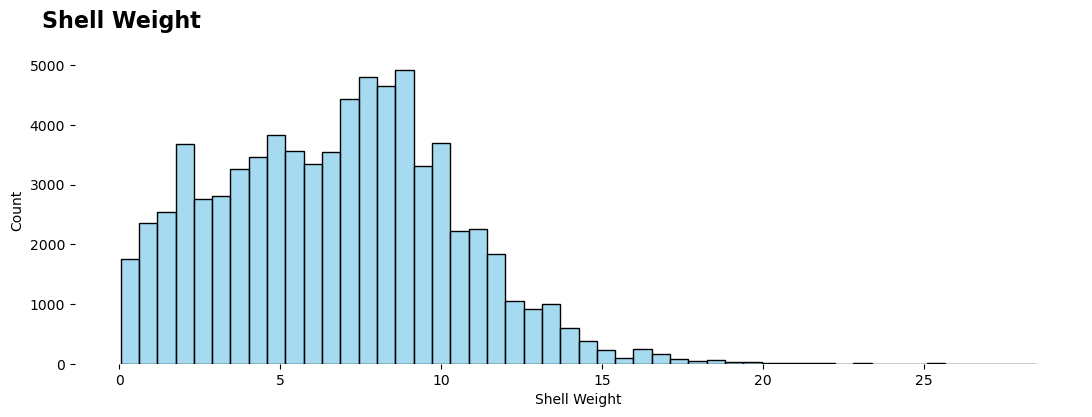

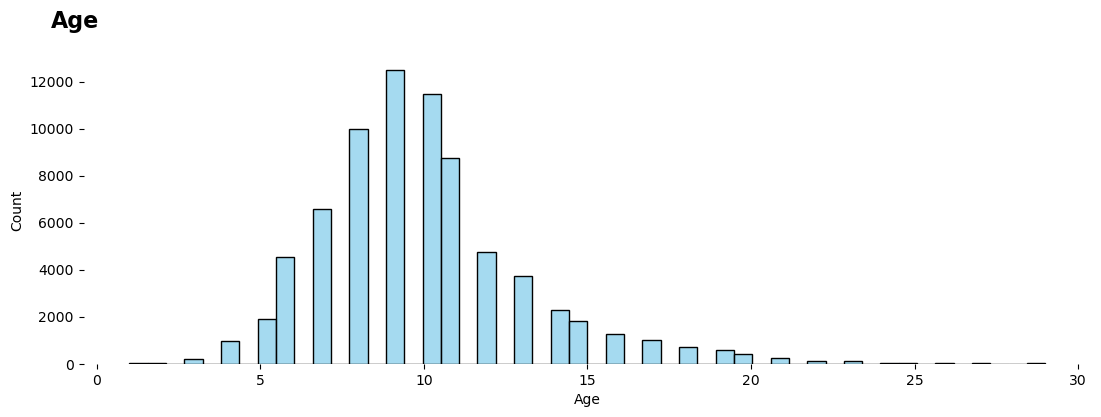

In [13]:
num = ['Length','Diameter','Height','Weight','Shucked Weight','Viscera Weight','Shell Weight','Age']
for n in num:
    fig,ax = plt.subplots(1,1,figsize=(13,4))
    sns.histplot(train_df[n],color='skyblue',bins=50)
    fig.text(x=0.1,y=0.95,s=f"{n}",fontsize=16,fontweight='bold',fontfamily='sans serif')
    plt.box(False)